## Observations and Insights 

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mousestudy_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how="left")
# Display the data table for preview
mousestudy_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [25]:
# Checking the number of mice.
mousestudy_df = mousestudy_df[(mousestudy_df["Drug Regimen"] == 'Capomulin') |
                      (mousestudy_df["Drug Regimen"] == 'Infubinol') |
                      (mousestudy_df["Drug Regimen"] == 'Ketapril') |
                      (mousestudy_df["Drug Regimen"] == 'Placebo')
                     ]

                     
mousestudy_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


## Summary Statistics

In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = mousestudy_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = mousestudy_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = mousestudy_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv = mousestudy_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = mousestudy_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
Summary_study = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv, 
                          "SEM": sem})
Summary_study
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331


## Bar and Pie Charts

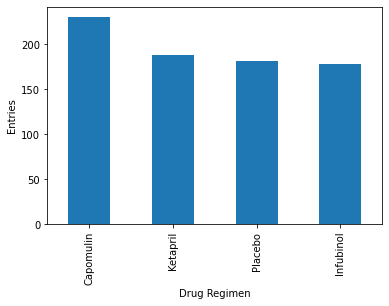

In [27]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
counts = mousestudy_df['Drug Regimen'].value_counts()
counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Entries")
plt.show()


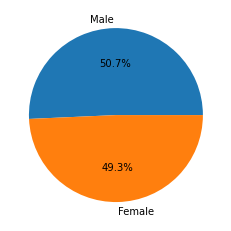

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

counts = mousestudy_df.Sex.value_counts()
plt.pie(counts.values,labels=["Male", "Female"],autopct='%1.1f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [29]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
mousestudy_df.head()




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [30]:
Mouse = mousestudy_df.groupby(["Mouse ID"]).max()
Mouse_Reset = Mouse.reset_index()

Data_Merge = Mouse_Reset[['Mouse ID','Timepoint']].\
    merge(mousestudy_df,on=['Mouse ID','Timepoint'],how="left")

def get_outliers(regimen):
    dtRegimen = Data_Merge.loc[Data_Merge["Drug Regimen"] == regimen]['Tumor Volume (mm3)']
    
    quartiles = dtRegimen.quantile([.25,.5,.75])
    quart_first = quartiles[0.25]
    quart_last = quartiles[0.75]
    quart_range = quart_last - quart_first
    lower_bound = quart_first - (1.5 * quart_range)
    upper_bound = quart_last + (1.5 * quart_range)

    outliers = dtRegimen.loc[(dtRegimen < lower_bound) | (dtRegimen > upper_bound)]
    print(outliers)
    return dtRegimen
    
cap = get_outliers("Capomulin")
ram = get_outliers("Ramicane")
inf = get_outliers("Infubinol")
ceft = get_outliers("Ceftamin")

Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
11    36.321346
Name: Tumor Volume (mm3), dtype: float64
Series([], Name: Tumor Volume (mm3), dtype: float64)


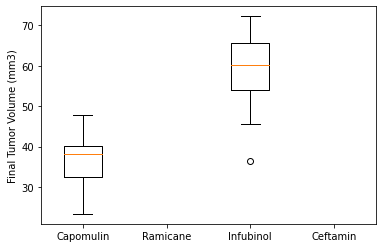

In [31]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot([cap, ram, inf, ceft],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'])
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

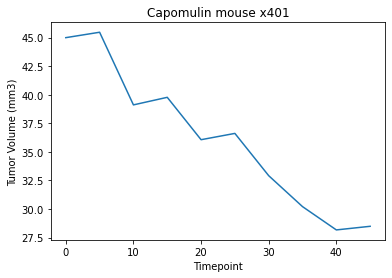

In [32]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
def get_line_plot(regimen, mouse_id):
    dtRegimen = mousestudy_df.loc[mousestudy_df["Drug Regimen"] == regimen]
    data_by_id = dtRegimen.loc[dtRegimen['Mouse ID'] == mouse_id]
    plt.plot(data_by_id['Timepoint'], data_by_id['Tumor Volume (mm3)'])
    plt.xlabel('Timepoint')
    plt.ylabel('Tumor Volume (mm3)')
    plt.title(regimen + " mouse " + mouse_id)
    plt.show()
    
get_line_plot("Capomulin", "x401")

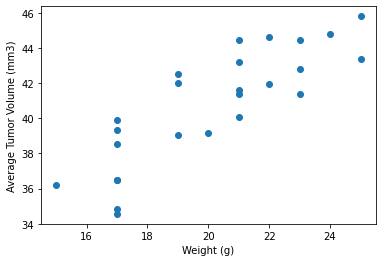

In [33]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
def generate_scatter_plot(regimen):
    dtRegimen = mousestudy_df.loc[mousestudy_df['Drug Regimen'] == regimen]
    averages = dtRegimen.groupby(['Mouse ID']).mean()
    plt.scatter(averages['Weight (g)'], averages['Tumor Volume (mm3)'])
    plt.xlabel('Weight (g)')
    plt.ylabel('Average Tumor Volume (mm3)')
    plt.show()
    return averages
cap_averages = generate_scatter_plot("Capomulin")

## Correlation and Regression

In [34]:
# Calculate the correlation coefficient and linear regression model 

MouseWeight = cap_averages.iloc[:,0]
average_TumorVolume = cap_averages.iloc[:,1]
correlation = st.pearsonr(MouseWeight,average_TumorVolume)
print(f"The correlation between both factors is {round(correlation[0],2)}")



The correlation between both factors is -0.07
